In [570]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

df = pd.read_csv('training_data.csv', sep=',', index_col=0, header=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
28835,220000,2,1,2,36,0,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,...,5444,2639,2697,2000,1100,600,300,300,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,40000,2,2,1,38,0,0,3,2,2,...,39924,39004,41462,4600,1200,1400,0,3069,0,1
2693,350000,1,1,1,42,-1,-1,-1,-1,-1,...,3750,1362,8210,3138,4160,3750,2272,8210,9731,0
8076,100000,2,3,2,46,1,-1,2,2,-1,...,0,7856,16544,203,0,0,7856,10000,865,0
20213,20000,2,3,1,50,-1,-1,-1,-1,-2,...,0,0,0,3754,6906,290,0,0,0,1


In [571]:
df.sort_index(axis=0, ascending=False, inplace=True)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
9999,80000,2,2,2,26,-1,2,2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
9997,80000,2,2,2,37,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
9995,170000,1,2,2,30,0,0,0,-1,-1,...,192,0,397,1000,0,193,0,397,0,1
9992,30000,2,2,1,47,1,2,2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,260000,2,1,1,40,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1000,120000,1,2,2,25,2,2,0,0,0,...,83858,86434,88802,0,5000,3158,3934,3802,2000,0
100,20000,1,2,1,38,0,0,0,0,0,...,18240,17928,150,1699,1460,626,1750,150,0,1
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [572]:
headers = df.iloc[0]
df  = pd.DataFrame(df.values[1:], columns=headers, dtype=np.int64)
df

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,80000,2,2,2,26,-1,2,2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
1,80000,2,2,2,37,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
2,170000,1,2,2,30,0,0,0,-1,-1,...,192,0,397,1000,0,193,0,397,0,1
3,30000,2,2,1,47,1,2,2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,260000,2,2,1,28,0,0,0,0,-1,...,150000,14098,28736,9388,5000,10000,14098,15000,15000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,260000,2,1,1,40,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
22495,120000,1,2,2,25,2,2,0,0,0,...,83858,86434,88802,0,5000,3158,3934,3802,2000,0
22496,20000,1,2,1,38,0,0,0,0,0,...,18240,17928,150,1699,1460,626,1750,150,0,1
22497,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [574]:
df = df.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})

df.columns = df.columns.str.lower()
df

ID,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
0,80000,2,2,2,26,-1,2,2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
1,80000,2,2,2,37,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
2,170000,1,2,2,30,0,0,0,-1,-1,...,192,0,397,1000,0,193,0,397,0,1
3,30000,2,2,1,47,1,2,2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,260000,2,2,1,28,0,0,0,0,-1,...,150000,14098,28736,9388,5000,10000,14098,15000,15000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,260000,2,1,1,40,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
22495,120000,1,2,2,25,2,2,0,0,0,...,83858,86434,88802,0,5000,3158,3934,3802,2000,0
22496,20000,1,2,1,38,0,0,0,0,0,...,18240,17928,150,1699,1460,626,1750,150,0,1
22497,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [575]:
df['def_pay'].value_counts()

0    17471
1     5028
Name: def_pay, dtype: int64

#### CLASS IMBALANCE

In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22499 entries, 0 to 22498
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   limit_bal  22499 non-null  int64
 1   sex        22499 non-null  int64
 2   education  22499 non-null  int64
 3   marriage   22499 non-null  int64
 4   age        22499 non-null  int64
 5   pay_1      22499 non-null  int64
 6   pay_2      22499 non-null  int64
 7   pay_3      22499 non-null  int64
 8   pay_4      22499 non-null  int64
 9   pay_5      22499 non-null  int64
 10  pay_6      22499 non-null  int64
 11  bill_amt1  22499 non-null  int64
 12  bill_amt2  22499 non-null  int64
 13  bill_amt3  22499 non-null  int64
 14  bill_amt4  22499 non-null  int64
 15  bill_amt5  22499 non-null  int64
 16  bill_amt6  22499 non-null  int64
 17  pay_amt1   22499 non-null  int64
 18  pay_amt2   22499 non-null  int64
 19  pay_amt3   22499 non-null  int64
 20  pay_amt4   22499 non-null  int64
 21  pay_amt5   2

In [577]:
df.describe()

ID,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,...,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,167054.521534,1.603227,1.855282,1.553358,35.447931,-0.014090,-0.128806,-0.160185,-0.214587,-0.259700,...,43329.149562,40306.373039,38955.000356,5627.914796,5.964393e+03,5258.912307,4792.971777,4865.656029,5247.279301,0.223477
std,129864.960118,0.489239,0.791905,0.521418,9.237634,1.123191,1.197954,1.198880,1.174824,1.139984,...,64607.088483,60918.993067,59773.144959,16628.162287,2.444370e+04,18153.554633,15872.858180,15507.449610,17892.327398,0.416584
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2319.500000,1732.500000,1230.000000,1000.000000,8.290000e+02,396.000000,284.000000,246.500000,100.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19048.000000,18050.000000,16924.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54494.500000,50196.000000,49250.000000,5002.000000,5.000000e+03,4500.000000,4000.000000,4068.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,388071.000000,528666.000000,1.000000


In [578]:
df.isna().sum()

ID
limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_1        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
def_pay      0
dtype: int64

# Target Variable

In [562]:
target_variable = df['def_pay']

In [563]:
df['def_pay'].value_counts()

0    17471
1     5028
Name: def_pay, dtype: int64

Target Variable
def_pay
0    17471
1     5028
Name: def_pay, dtype: int64


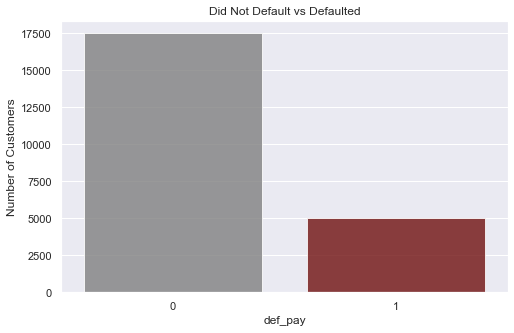

In [564]:
print('Target Variable')
print(df.groupby(['def_pay']).def_pay.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (8,5))
sns.countplot(df['def_pay'], alpha =.80, palette= ['grey','maroon'])
plt.title('Did Not Default vs Defaulted')
plt.ylabel('Number of Customers')
plt.show()

# Categorical Variables

In [565]:
# plt.figure(figsize = (7,5))
# sns.countplot(x = 'sex', y = 'age', data = df, palette= ['grey','maroon'])
# plt.title('')
# plt.show()

TP we correctly predicted that they will default

TN we correctly predicted that they  will not default

FP we incorrectly predicted they they will default

FN we incorrectly predicted that they will not default 

# Continuous Variables

In [580]:
df_cont_variables = df.drop(columns=['sex', 'education', 'marriage', 'age','def_pay'],axis=1, inplace=True)

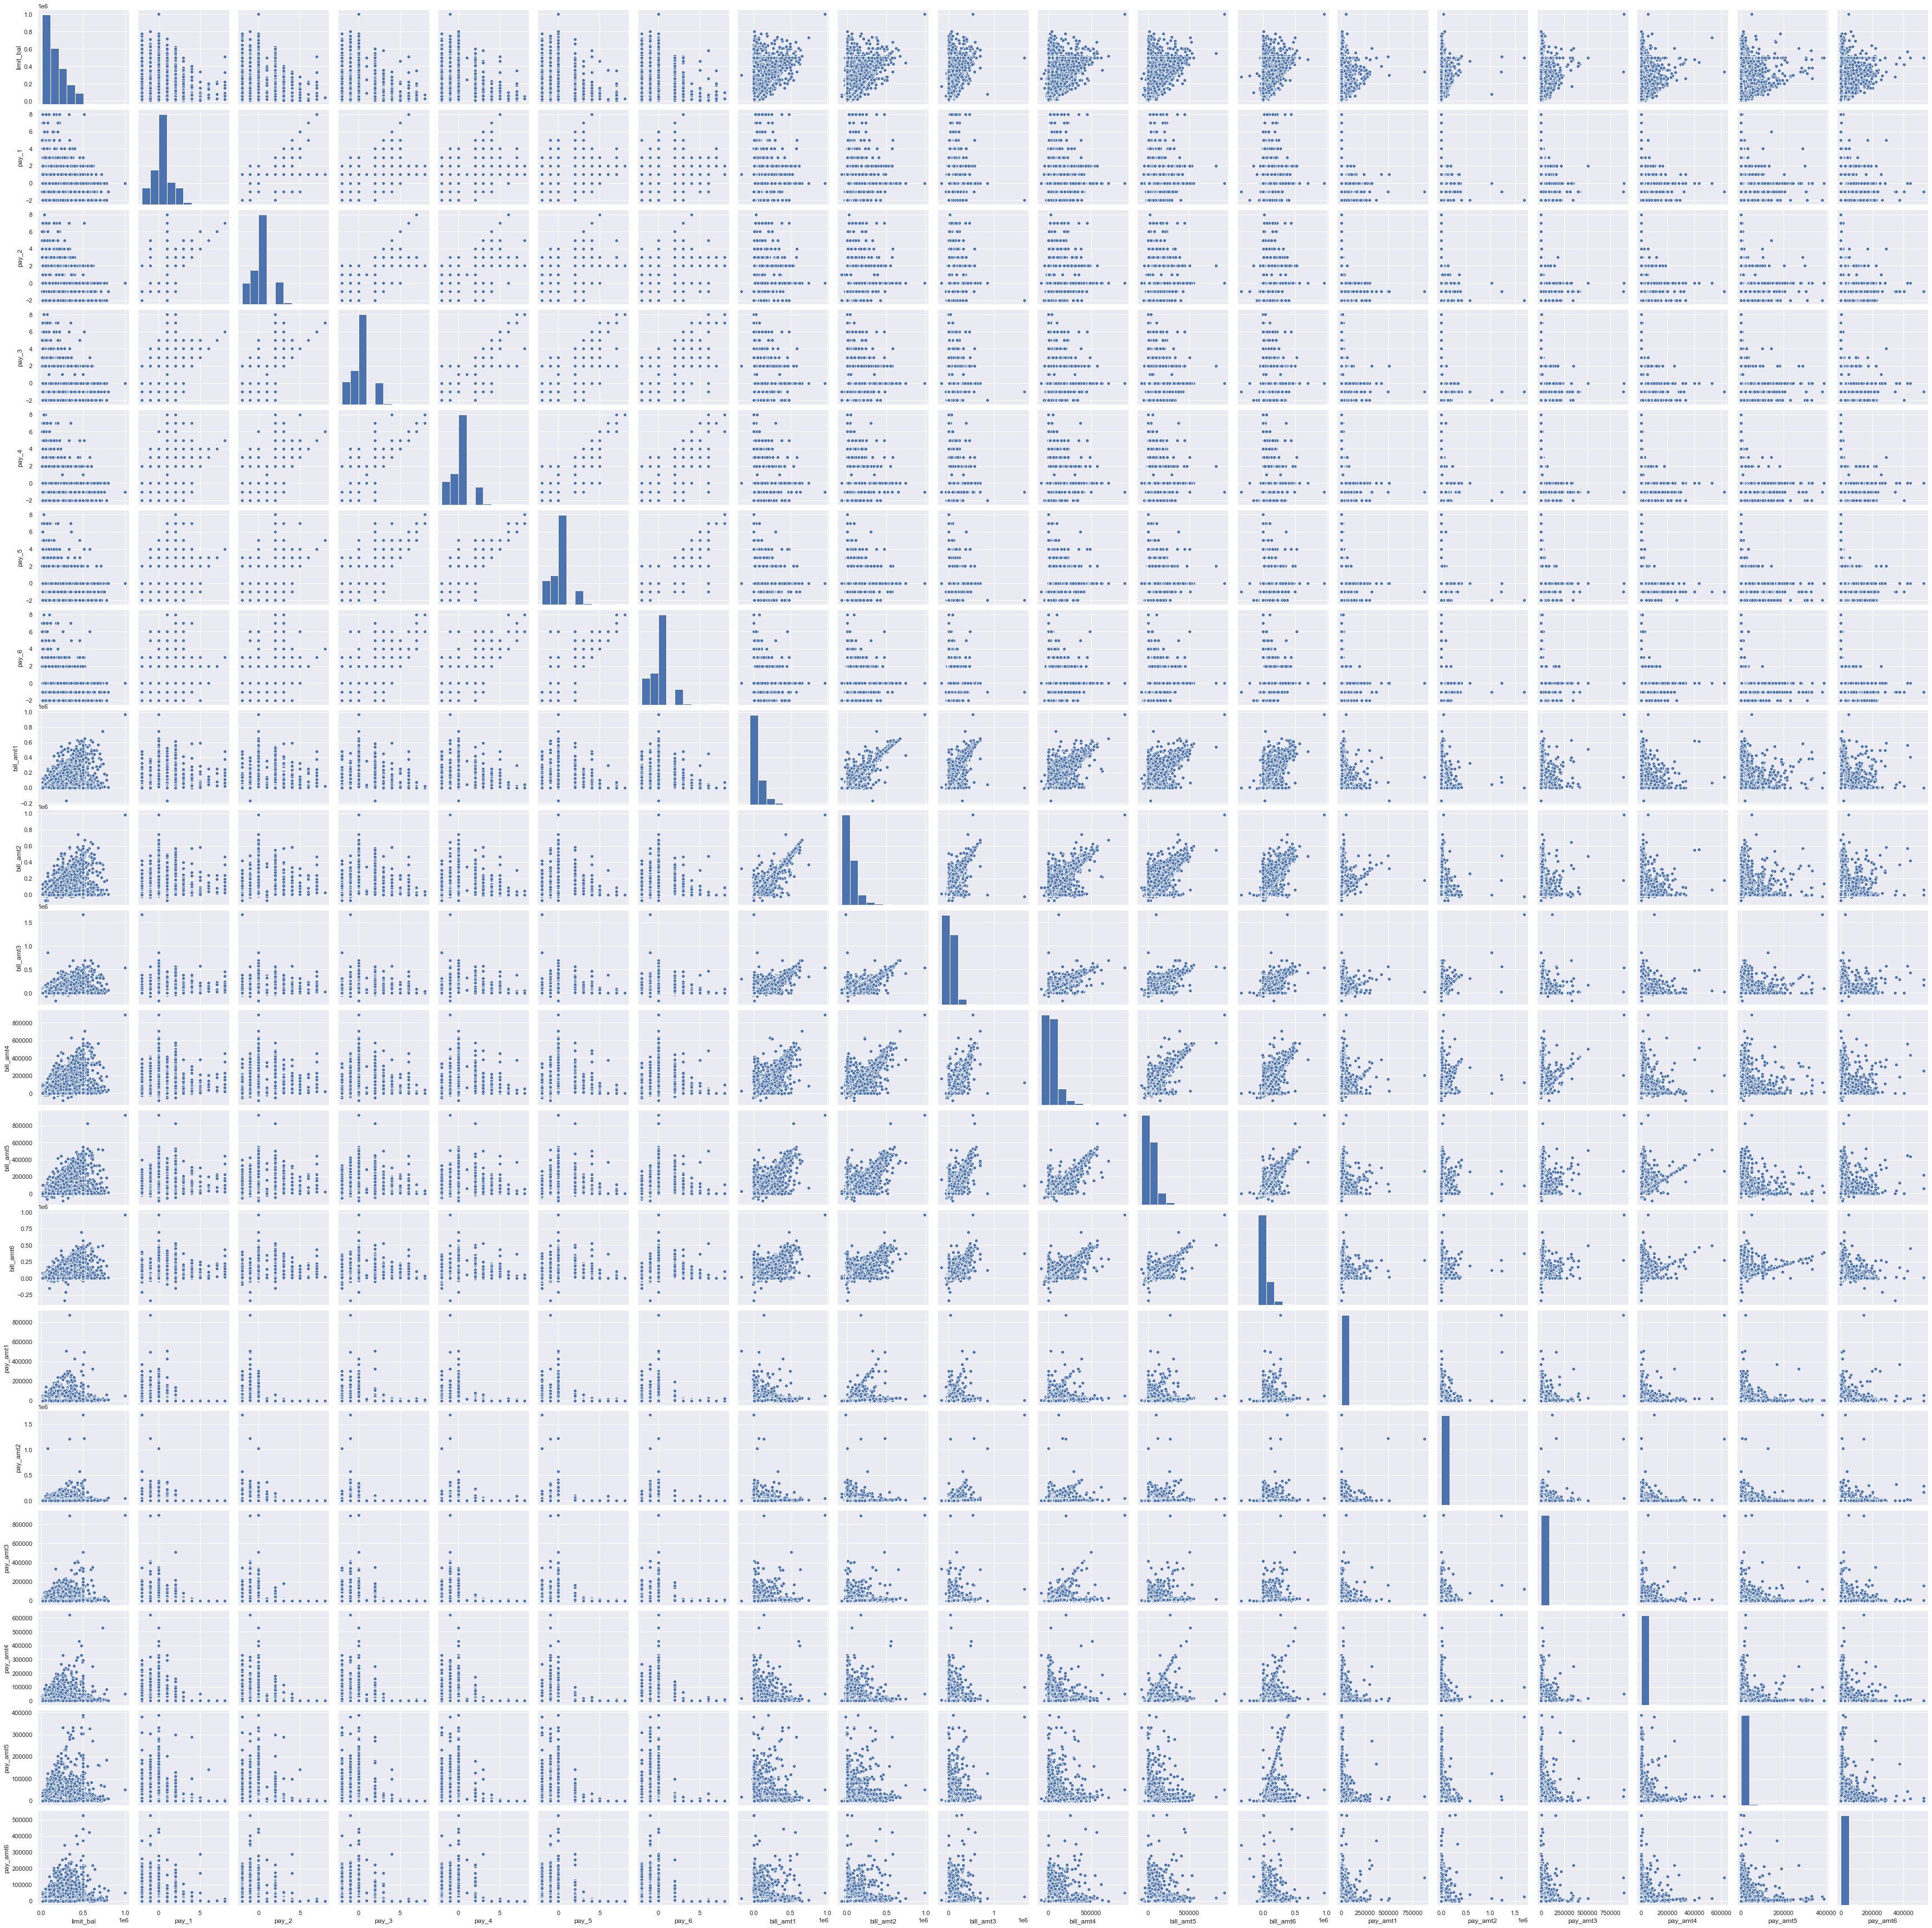

In [583]:
sns.pairplot(df)

# Class Imbalance

# LogisticRegression Models
## - Create baseline
## - GridSearchCV
## - Tune hyperparameters
## - Choose best model based on hyperparameters

# KNN Models
## - Create baseline
## - GridSearchCV
## - Tune hyperparameters
## - Choose best model based on hyperparameters

# DecisionTree Models
## - Create baseline
## - GridSearchCV
## - Tune hyperparameters
## - Choose best model based on hyperparameters

# CrossValidate best model

## VotingClassifier/BaggingClassifier - Ensemble Models

In [ ]:
# df = df.drop(columns="Unnamed: 0") # drop unncessary columns
# rename_list = ["max_credit", "gender", "education", "marital_status", "age",
#                "pay_status_sep", "pay_status_aug", "pay_status_jul", "pay_status_jun", "pay_status_may", "pay_status_apr",
#                "bill_sep", "bill_aug", "bill_jul", "bill_jun", "bill_may", "bill_apr",
#                "payment_sep", "payment_aug", "payments_jul", "payment_jun", "payment_may", "payment_apr",
#                 "default"]
# col_rename = dict(zip(df.columns,rename_list))
# df = df.rename(columns=col_rename)